<a href="https://colab.research.google.com/github/RunatK/NN_MNIST_train_RNN/blob/main/MNIST_train_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import numpy as np
import random
import torchvision.datasets
import matplotlib.pyplot as plt

In [3]:
random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [6]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False)
None

In [7]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
X_train = MNIST_train.data
Y_train = MNIST_train.targets
X_test = MNIST_test.data
Y_test = MNIST_test.targets

In [9]:
X_test = X_test.to(device)
Y_test = Y_test.to(device)

In [10]:
X_train = X_train.float()
X_test = X_test.float()

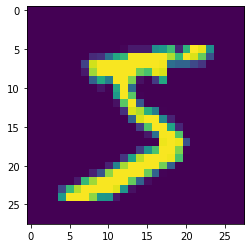

In [11]:
plt.imshow(X_train[0, :, :])
plt.show()

In [12]:
X_train = X_train.reshape([-1, 28*28])
X_test = X_test.reshape([-1, 28*28])

In [13]:
class MNISTNet(torch.nn.Module):#ВТФ is torch.nn.Module
    def __init__(self, n_hidden_neurons):
        super(MNISTNet, self).__init__()
        self.fc1 = torch.nn.Linear(28*28, n_hidden_neurons)
        self.ac1 = torch.nn.Sigmoid()
        self.fc2 = torch.nn.Linear(n_hidden_neurons, 10)#Потому что угадываем число от 0 до 10

    def forward(self, x):
        x = self.fc1(x)
        x = self.ac1(x)
        x = self.fc2(x)
        return x

In [17]:
mnist_net = MNISTNet(100)
mnist_net = mnist_net.to(device)
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(mnist_net.parameters(), lr = 1.0e-3)

In [19]:
batch_size = 100
test_accuracy_history = []
test_loss_history = []

for epoch in range(25):
    order = np.random.permutation(len(X_train))
    
    for start_index in range(0, len(X_train), batch_size):
        optimizer.zero_grad()
        batch_indexes = order[start_index:start_index*batch_size]
        X_batch = X_train[batch_indexes].to(device)
        Y_batch = Y_train[batch_indexes].to(device)
        preds = mnist_net.forward(X_batch)
        loss_value = loss(preds, Y_batch)
        loss_value.backward()
        optimizer.step()

    test_preds = mnist_net.forward(X_test)
    test_loss_history.append(loss(test_preds, Y_test).cpu())
    accuracy = (test_preds.argmax(dim=1) == Y_test).float().mean().cpu()
    test_accuracy_history.append(accuracy)
    print(accuracy)

tensor(0.9381)
tensor(0.9444)
tensor(0.9505)
tensor(0.9504)
tensor(0.9528)
tensor(0.9511)
tensor(0.9525)
tensor(0.9532)
tensor(0.9538)
tensor(0.9558)
tensor(0.9556)
tensor(0.9559)
tensor(0.9569)
tensor(0.9568)
tensor(0.9567)
tensor(0.9583)
tensor(0.9578)
tensor(0.9567)
tensor(0.9579)
tensor(0.9561)
tensor(0.9585)
tensor(0.9589)
tensor(0.9598)
tensor(0.9592)
tensor(0.9591)


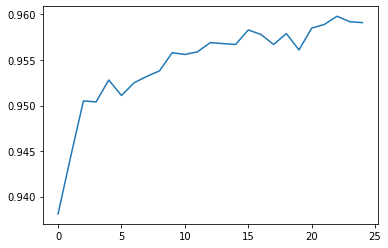

In [20]:
plt.plot(test_accuracy_history)

In [21]:
test_loss_h = []
for i in test_loss_history:
  test_loss_h.append(i.detach())

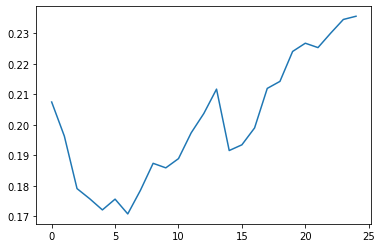

In [22]:
plt.plot(test_loss_h)